In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('smoke_detection_iot.csv')

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [8]:
df['UTC'].value_counts()

1654733331    1
1654778092    1
1654778094    1
1654778095    1
1654778096    1
             ..
1654754212    1
1654754213    1
1654754214    1
1654754215    1
1655130051    1
Name: UTC, Length: 62630, dtype: int64

In [9]:
p=[]
for i in df.columns:
    p.append(len(df[i].unique()))

In [10]:
print(list(zip(df.columns,p)))

[('UTC', 62630), ('Temperature[C]', 21672), ('Humidity[%]', 3890), ('TVOC[ppb]', 1966), ('eCO2[ppm]', 1713), ('Raw H2', 1830), ('Raw Ethanol', 2659), ('Pressure[hPa]', 2213), ('PM1.0', 1337), ('PM2.5', 1351), ('NC0.5', 3093), ('NC1.0', 4113), ('NC2.5', 1161), ('CNT', 24994), ('Fire Alarm', 2)]


In [11]:
import seaborn as sns

<AxesSubplot:>

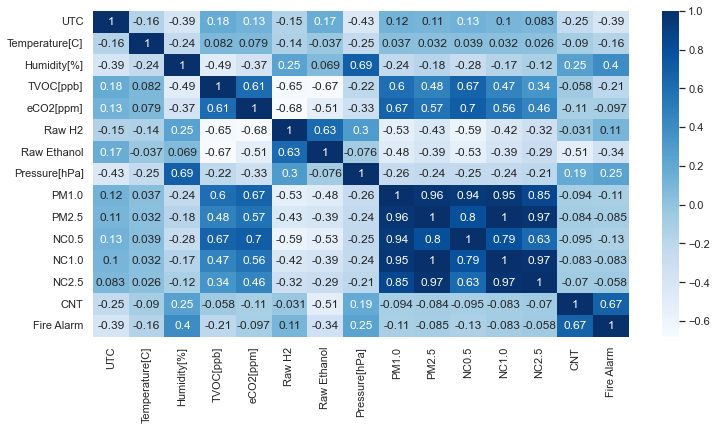

In [12]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='PM2.5', ylabel='NC1.0'>

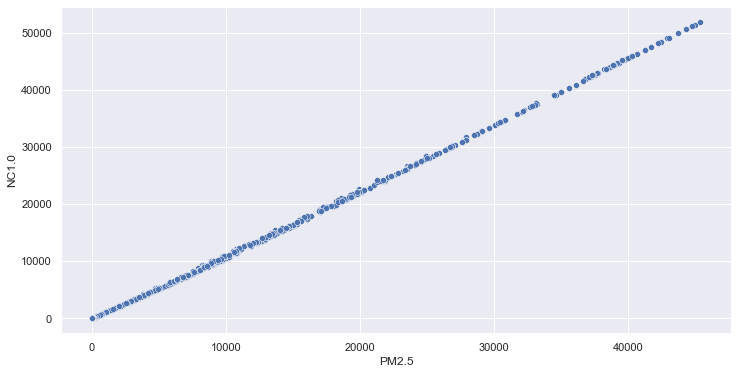

In [13]:
sns.scatterplot(x='PM2.5',y='NC1.0',data=df)

Correlation is 1 and it is practicaly a linear graph. As PM2.5 increases, NC1.0 increases

<AxesSubplot:xlabel='PM2.5', ylabel='NC2.5'>

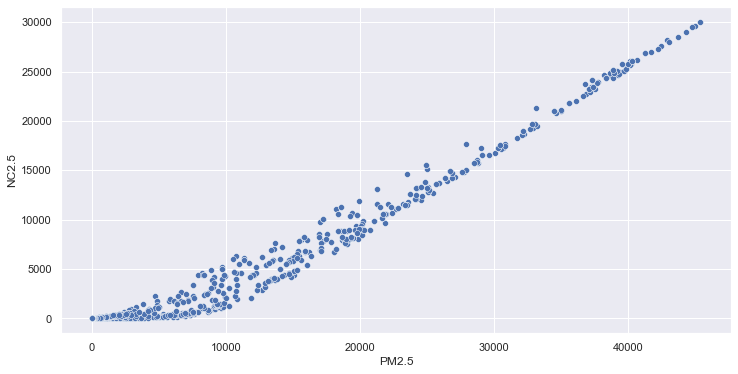

In [14]:
sns.scatterplot(x='PM2.5',y='NC2.5',data=df)

The graph is pretty curved in the beggening, but then it straightens out into something linear. As PM2.5 increases, NC2.5 also increases

<AxesSubplot:xlabel='NC2.5', ylabel='NC1.0'>

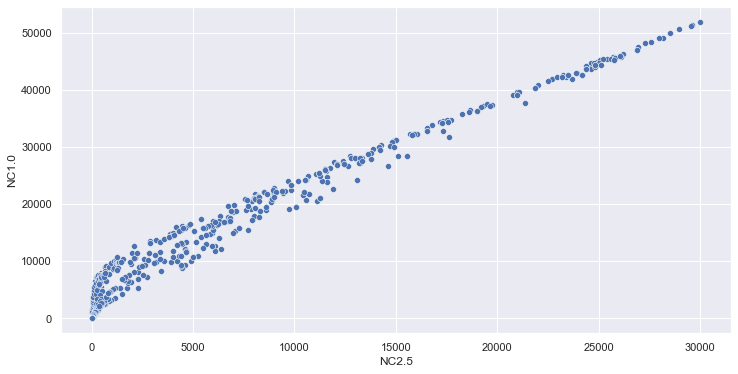

In [15]:
sns.scatterplot(x='NC2.5',y='NC1.0',data=df)

The graph is pretty curved in the beggening, but then it straightens out into something linear. As NC2.5 increases, NC1.0 also increases

<AxesSubplot:xlabel='PM1.0', ylabel='PM2.5'>

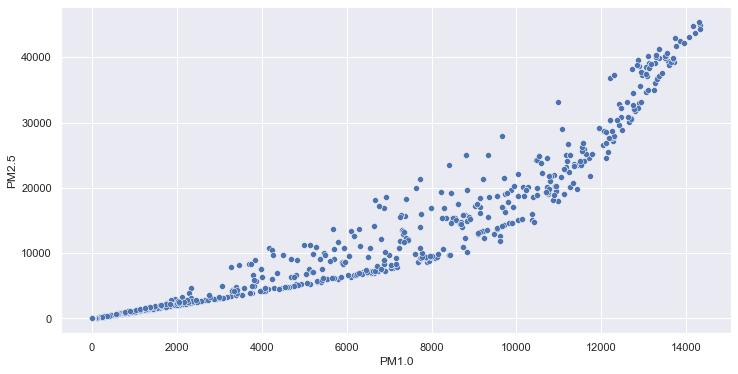

In [16]:
sns.scatterplot(x='PM1.0',y='PM2.5',data=df)

The curve is linear in the beggening, but curves towards then end. As PM1.0 increases, PM2.5 increases too

<AxesSubplot:xlabel='NC1.0', ylabel='PM1.0'>

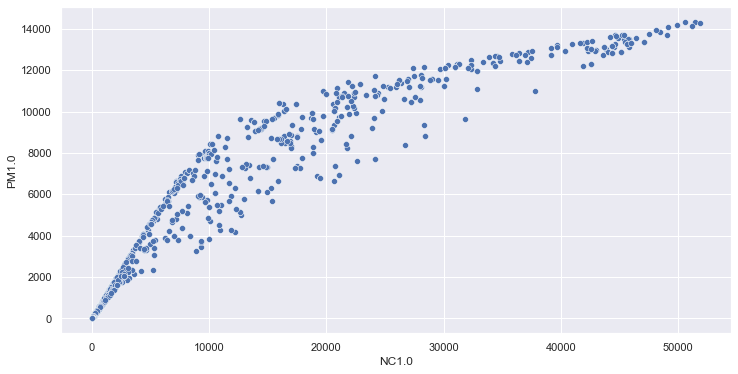

In [17]:
sns.scatterplot(x='NC1.0',y='PM1.0',data=df)

The graph is a curved line. As NC1 increases,PM1.0 increases.

<AxesSubplot:xlabel='PM1.0', ylabel='NC0.5'>

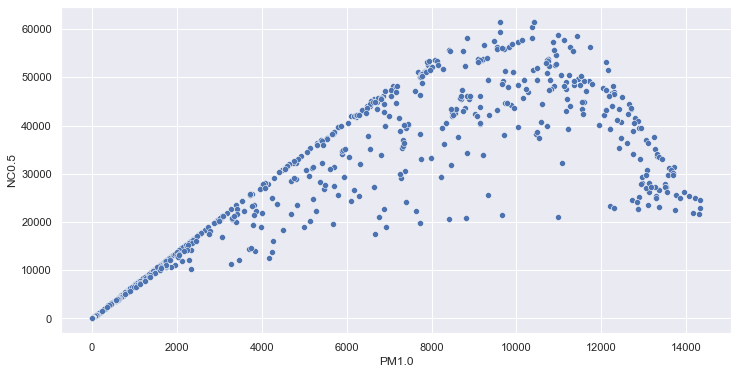

In [19]:
sns.scatterplot(x='PM1.0',y='NC0.5',data=df)

It is linear in the beggening, but then curves and then deaccelerates. As PM1.0 was increasing, NC0.5 was increasing, but then was decreasing

<AxesSubplot:xlabel='NC2.5', ylabel='PM1.0'>

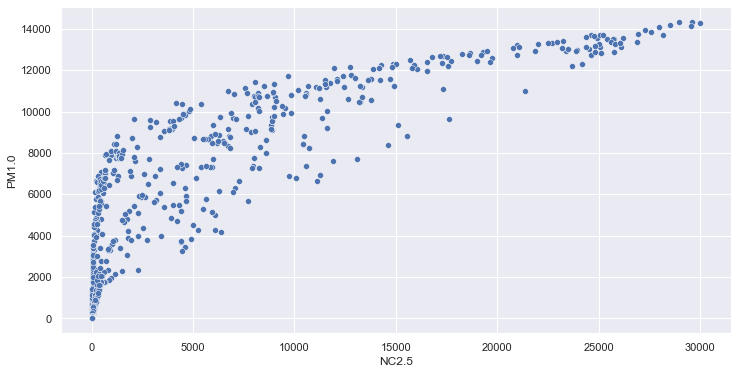

In [20]:
sns.scatterplot(x='NC2.5',y='PM1.0',data=df)

The graph is totally curved, but as NC2.5 increases, PM1.0 increases.

In [22]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [24]:
df=df.drop('UTC',axis=1)

In [25]:
x=df.drop('Fire Alarm',axis=1)
y=df['Fire Alarm']

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
reg=LogisticRegression()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
reg.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
forest.fit(xtrain,ytrain)
p=[]
k=[reg,tree,forest]
for i in k:
    p.append(i.score(xtest,ytest))

C:\Users\gvana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
p

[0.9767683218904678, 1.0, 1.0]

In [35]:
max(p)

1.0

In [41]:
list(zip(k,p))

[(LogisticRegression(), 0.9767683218904678),
 (DecisionTreeClassifier(), 1.0),
 (RandomForestClassifier(), 1.0)]

In [44]:
tree_pred=tree.predict(xtest)

In [45]:
forest_pred=forest.predict(xtest)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(tree_pred,ytest)

array([[3545,    0],
       [   0, 8981]], dtype=int64)

In [48]:
confusion_matrix(forest_pred,ytest)

array([[3545,    0],
       [   0, 8981]], dtype=int64)